In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/banknifty-minute-data-09-jan-2015-to-22-mar-2024/banknifty_candlestick_data.csv
/kaggle/input/banknifty-minute-data-09-jan-2015-to-22-mar-2024/LICENSE
/kaggle/input/banknifty-minute-data-09-jan-2015-to-22-mar-2024/README.md


In [2]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
df = pd.read_csv('/kaggle/input/banknifty-minute-data-09-jan-2015-to-22-mar-2024/banknifty_candlestick_data.csv', parse_dates=['Date'])

In [4]:
# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [5]:
# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
  Instrument        Date     Time     Open      High       Low     Close
0  Banknifty  09-01-2015  9:15:00  18845.9  18845.90  18801.70  18801.70
1  Banknifty  09-01-2015  9:16:00  18801.7  18806.05  18790.20  18794.65
2  Banknifty  09-01-2015  9:17:00  18796.0  18829.00  18794.65  18827.30
3  Banknifty  09-01-2015  9:18:00  18827.3  18864.00  18827.30  18862.10
4  Banknifty  09-01-2015  9:19:00  18862.1  18862.10  18843.55  18849.25


In [6]:
# Summary Statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                Open           High            Low          Close
count  851392.000000  851392.000000  851392.000000  851392.000000
mean    28885.757316   28894.838007   28876.578721   28885.723631
std      9125.935255    9127.860984    9123.945907    9125.950572
min     13441.550000   13471.450000   13411.600000   13442.800000
25%     20495.725000   20508.337500   20484.337500   20495.937500
50%     27196.875000   27204.450000   27189.050000   27196.800000
75%     35967.362500   35980.400000   35954.500000   35967.200000
max     48611.150000   48636.450000   48601.300000   48614.050000


In [7]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Instrument    0
Date          0
Time          0
Open          0
High          0
Low           0
Close         0
dtype: int64


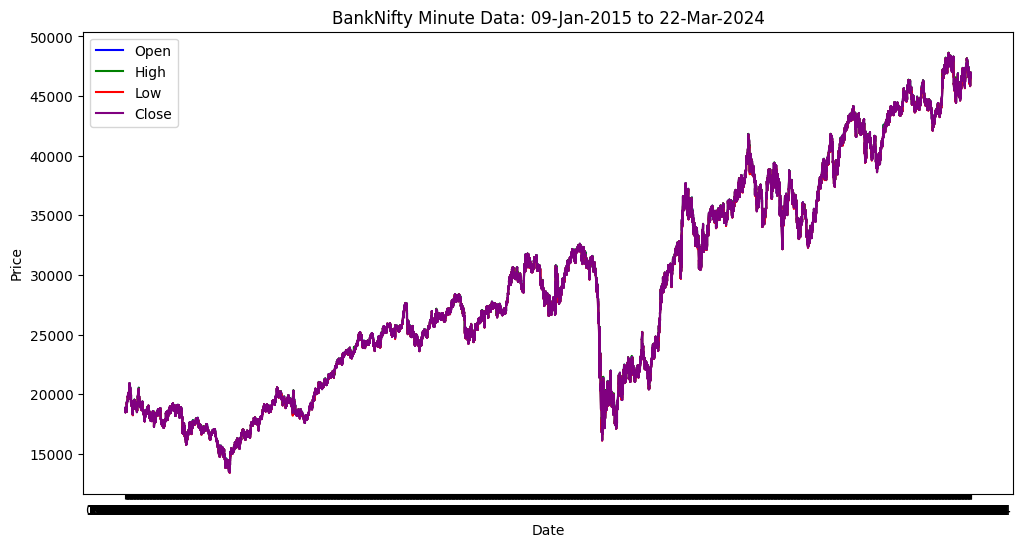

In [8]:
# Time series analysis
# Plotting Open, High, Low, and Close prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Open'], label='Open', color='blue')
plt.plot(df['Date'], df['High'], label='High', color='green')
plt.plot(df['Date'], df['Low'], label='Low', color='red')
plt.plot(df['Date'], df['Close'], label='Close', color='purple')
plt.title('BankNifty Minute Data: 09-Jan-2015 to 22-Mar-2024')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


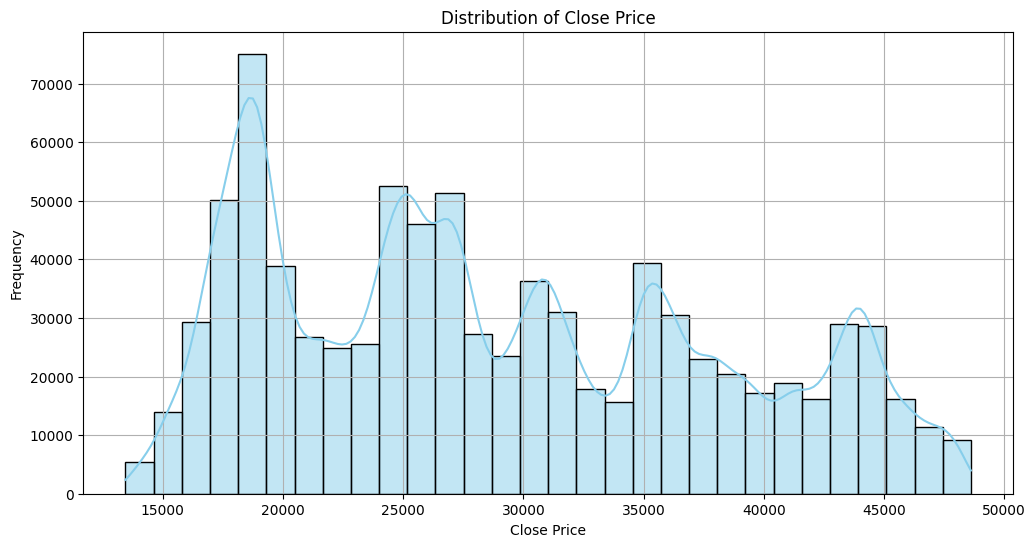

In [9]:
# Distribution of Prices
plt.figure(figsize=(12, 6))
sns.histplot(df['Close'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

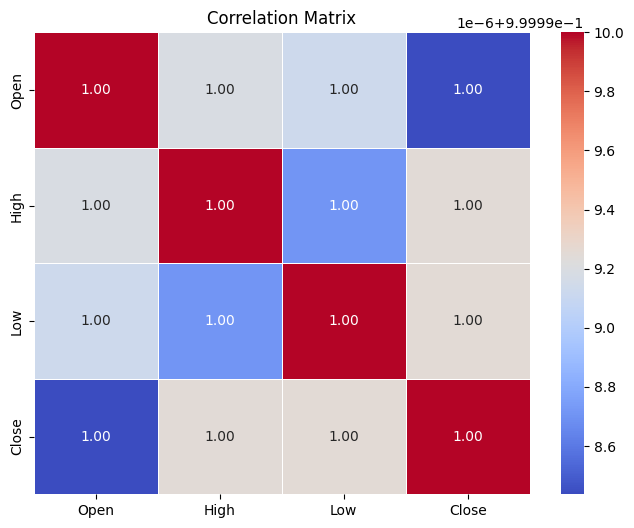

In [10]:
# Correlation Analysis
correlation_matrix = df[['Open', 'High', 'Low', 'Close']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


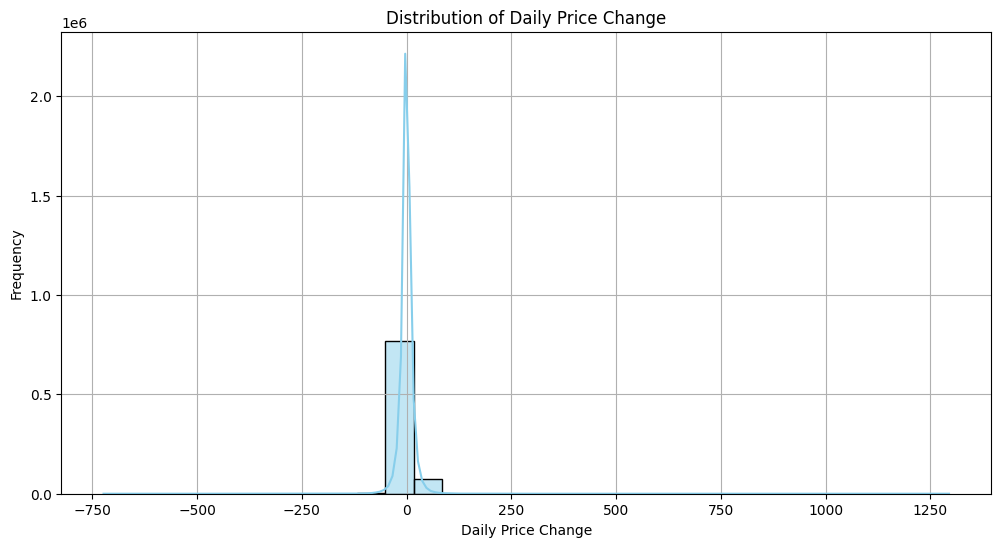

In [11]:
# Daily Price Change
df['Daily_Price_Change'] = df['Close'] - df['Open']
plt.figure(figsize=(12, 6))
sns.histplot(df['Daily_Price_Change'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Daily Price Change')
plt.xlabel('Daily Price Change')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

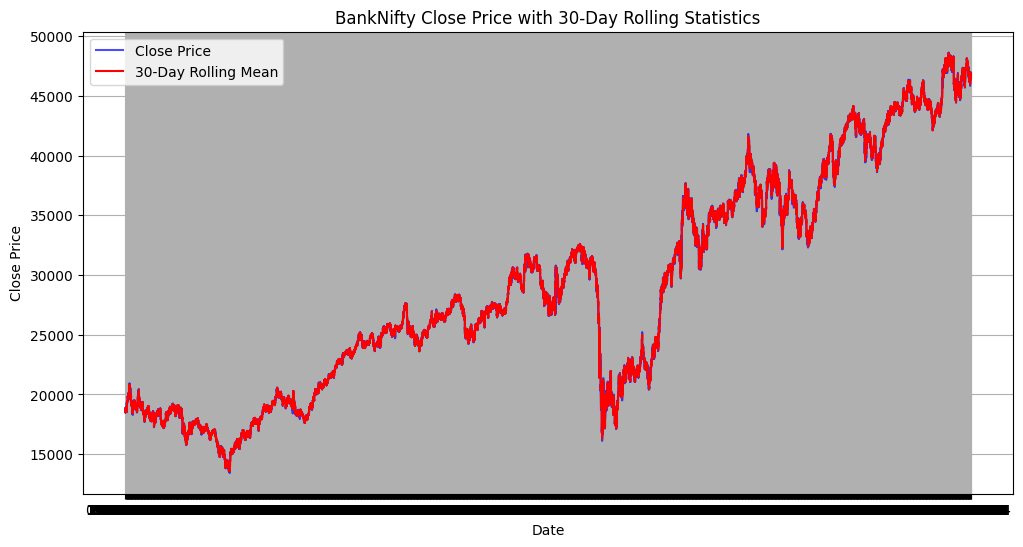

In [12]:
# Rolling Statistics
window_size = 30  # Adjust window size as needed
rolling_mean = df['Close'].rolling(window=window_size).mean()
rolling_std = df['Close'].rolling(window=window_size).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue', alpha=0.7)
plt.plot(df['Date'], rolling_mean, label=f'{window_size}-Day Rolling Mean', color='red')
plt.fill_between(df['Date'], rolling_mean - rolling_std, rolling_mean + rolling_std, color='orange', alpha=0.2)
plt.title(f'BankNifty Close Price with {window_size}-Day Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

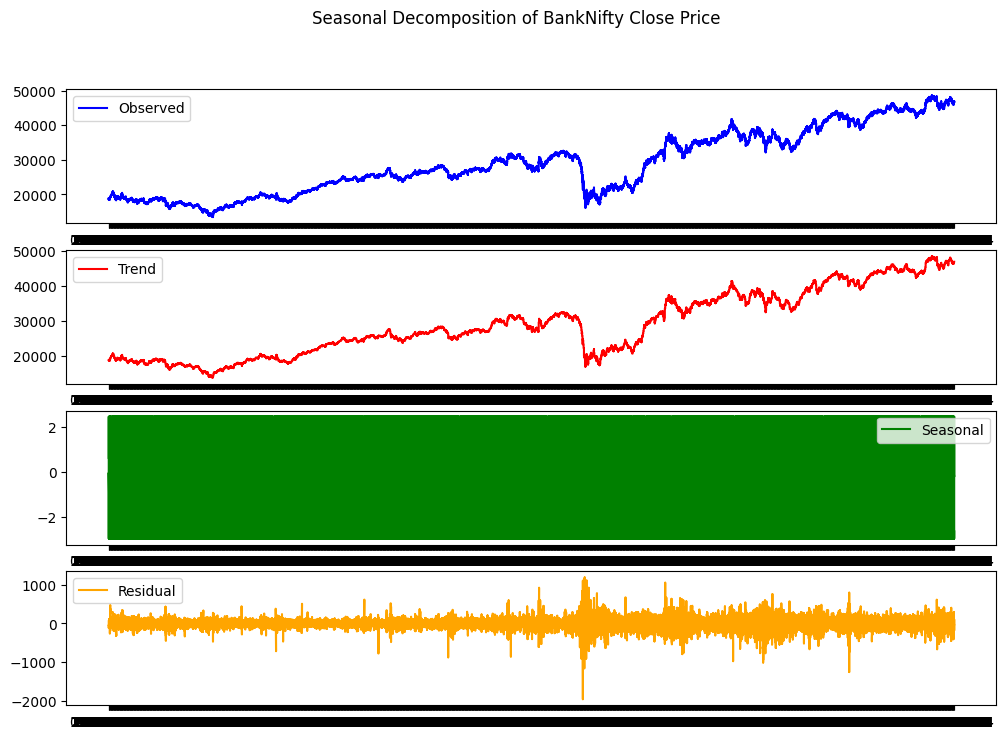

In [13]:
# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Close'], model='additive', period=252)  # Adjust period as needed
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Date'], result.observed, label='Observed', color='blue')
plt.legend()

plt.subplot(412)
plt.plot(df['Date'], result.trend, label='Trend', color='red')
plt.legend()

plt.subplot(413)
plt.plot(df['Date'], result.seasonal, label='Seasonal', color='green')
plt.legend()

plt.subplot(414)
plt.plot(df['Date'], result.resid, label='Residual', color='orange')
plt.legend()

plt.suptitle('Seasonal Decomposition of BankNifty Close Price')
plt.show()